In [1]:
import os
from agents import Agent,Runner, ModelSettings
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.environ['OPENAI_API_KEY_MALI']

from helpers.helper_agents import query_rewrite,recommender_agent,responsive_agent
from helpers.travel_agents import f_agent, h_agent
from helpers.function_tools import flight_search_2, hotels_search2

import nest_asyncio
nest_asyncio.apply()

from agents.extensions.visualization import draw_graph

END OF THE SCRIPT


In [2]:
ank = "ankara(ESB)"
ist = "istanbul(SAW)"
amst = "amsterdam(AMS)"
pekin = "Peking(PEK)"

start_point = ank 
dest_point = amst



query_1 = f"""I want to travel from {start_point} to {dest_point}. 
The outbound date is 2025-05-05 and the return date will be 2025-05-11. 
tell me the cheapest travel and What are the best hotels in Amsterdam.
Calculate the cheapest option interms of flight and hotels""".strip()

In [3]:
travel_info_agent = Agent(
    name = """travel components""",
    instructions="""
You are a helpful asisstant on searching and offering flight tickets and hotel booking according to user needs.
""",
    model = 'gpt-4o-mini',
    model_settings=ModelSettings(temperature=0.0, max_tokens = 4096*8),
    # tools= [flight_search_2,
    #         hotels_search2]
    tools = [
        f_agent.as_tool(
            tool_name = "Flight_Assistant_agent", 
            tool_description="Arranges flight ticket according to user needs"
        ),
        h_agent.as_tool(
            tool_name = "Hotels_Assistant_agent", 
            tool_description="Arranges hotel accomodations according to user needs"
        ),
    ]
    )

In [4]:
res = Runner.run_sync(travel_info_agent,query_1)

In [5]:
print(res.final_output)

### Travel Details from Ankara (ESB) to Amsterdam (AMS)

#### Cheapest Flight Option
- **Total Price:** $471
- **Total Duration:** 11 hours 5 minutes

**Outbound Flight:**
1. **Airline:** AJet (VF 4072)
   - **Departure:** 2025-05-05, 11:00 from ESB
   - **Arrival:** 2025-05-05, 12:20 at DLM
   - **Duration:** 80 minutes

2. **Airline:** SunExpress (XQ 3504)
   - **Departure:** 2025-05-05, 14:40 from DLM
   - **Arrival:** 2025-05-05, 19:00 at MAN
   - **Duration:** 280 minutes

3. **Airline:** easyJet (U2 2167)
   - **Departure:** 2025-05-05, 18:45 from MAN
   - **Arrival:** 2025-05-05, 20:05 at AMS
   - **Duration:** 80 minutes

#### Return Flight
- Details for the return flight are not provided. Please specify if you need assistance with that.

---

### Best Hotels in Amsterdam (May 5 - May 11, 2025)

1. **The Hoxton, Amsterdam**
   - **Price per Night:** $443
   - **Rating:** 4.5

2. **Park Centraal Amsterdam**
   - **Price per Night:** $328
   - **Rating:** 4.4

3. **Grand Hotel Am

In [6]:
query_rewrite = Agent(
    name = "Query Rewrite Agent",
    instructions="""
# TRAVEL_ASSISTANT_QUERY_DECOMPOSITION_AND_SYNTHESIS_SYSTEM
Today: {date.today()}

You are a world-class travel assistant with expertise in query analysis and planning. Your task has two parts:
1. Break down complex travel queries into simpler, sequential subquestions
2. Generate a detailed final query that synthesizes all the information needed to provide comprehensive travel assistance
3. If the output needs, Handoff the subquestions the travel_info_agent tool 

Guidelines for Subquestions:
* Break down complex travel requests into manageable components
* Each subquestion should focus on a single aspect of travel (e.g., destination, accommodation, transportation, activities)
* Subquestions should build upon each other logically to create a complete travel plan
* Generate only necessary subquestions to understand the traveler's needs
* Maintain all specific criteria (travel dates, budget constraints, preferences, locations, etc.)
* Number the subquestions sequentially
* Do not miss any details from the given travel query

Guidelines for Final Query:
* Synthesize all information from subquestions
* Add specific travel-related details and clarifications from subquestions
* Expand abbreviations and location names
* Include all relevant context for travel planning
* Maintain all original criteria and travel requirements
* Do not add additional details which do not appear in the subquestions
* Structure the query clearly for optimal travel assistance
* Do not expand the travel topics in the final query beyond what was covered in the subquestions

<example_input>
I want to plan a family vacation to Europe for 2 weeks in summer, with a focus on kid-friendly activities and cultural experiences, staying in mid-range hotels.
</example_input>

<example_output>
    "final_detailed_query": "Please provide a comprehensive 2-week summer family vacation itinerary for Europe that includes:
    - Recommended destinations based on family-friendly appeal and cultural significance
    - A day-by-day schedule for the entire 2-week period with optimal routing between locations
    - Specific kid-friendly activities and cultural experiences at each destination
    - Mid-range hotel recommendations that accommodate families, including pricing and availability
    - Transportation options between destinations and from airports/stations to hotels
    - Estimated budget breakdown for accommodations, transportation, activities, and meals
    - Essential travel tips for families visiting these European destinations during summer
    The itinerary should balance cultural experiences with entertainment appropriate for children, maintain a reasonable pace for family travel, and stay within a mid-range budget for accommodations."

<example_input>
Looking for a weekend getaway in a remote cabin with hiking trails nearby, preferably less than 3 hours drive from Seattle.
</example_input>

<example_output>
    "final_detailed_query": "Please find weekend cabin rental options that:
    - Are located within a maximum 3-hour driving distance from Seattle, Washington
    - Provide a sense of seclusion or remoteness from urban environments
    - Have direct access or are within short driving distance to hiking trails
    - Include availability information for upcoming weekends
    - Feature essential amenities for a comfortable stay
    
    For each recommendation, please provide:
    - Exact location and driving time from Seattle
    - Description of the cabin and its amenities
    - Nearby hiking trail options with difficulty levels and lengths
    - Pricing for a 2-night weekend stay
    - Booking information and cancellation policies"


<example_input>
I need recommendations for business travel to Tokyo in October, including hotels near the financial district with good meeting facilities and transportation options to Narita airport.
</example_input>

<example_output>
    "final_detailed_query": "Please provide business travel recommendations for Tokyo in October that include:
    - Business-class hotels located specifically in or near Tokyo's financial district (particularly Marunouchi, Nihonbashi, or Otemachi areas)
    - Properties with dedicated business facilities including meeting rooms, business centers, and high-speed internet
    - Detailed information about transportation options between these hotels and Narita International Airport, including travel times, costs, and schedules for trains, airport limousine buses, and taxi services
    - Typical room rates for October and availability of corporate rates
    - Business amenities in rooms and executive lounge access where applicable
    - Proximity to key financial institutions and corporate offices
    - Dining options suitable for business meetings within or near the hotels
    
    The recommendations should prioritize convenience for business travelers, professional environments for meetings, and efficient airport access."


</example_output>
""",
model = 'gpt-4o-mini',
# model = 'gpt-4o', 
model_settings = ModelSettings(temperature = 0.0, max_tokens = 1024*3),
handoffs=[travel_info_agent,recommender_agent],
)


res = Runner.run_sync(query_rewrite,query_1)

In [7]:
print(res.final_output)

### Travel Details from Ankara (ESB) to Amsterdam (AMS)

#### Cheapest Flight Option
- **Total Price:** $471
- **Total Duration:** 11 hours 5 minutes

**Outbound Flight:**
1. **Airline:** AJet (VF 4072)
   - **Departure:** 2025-05-05, 11:00 from ESB
   - **Arrival:** 2025-05-05, 12:20 at DLM
   - **Duration:** 1 hour 20 minutes

2. **Airline:** SunExpress (XQ 3504)
   - **Departure:** 2025-05-05, 14:40 from DLM
   - **Arrival:** 2025-05-05, 17:20 at MAN
   - **Duration:** 4 hours 40 minutes

3. **Airline:** easyJet (U2 2167)
   - **Departure:** 2025-05-05, 18:45 from MAN
   - **Arrival:** 2025-05-05, 21:05 at AMS
   - **Duration:** 1 hour 20 minutes

#### Hotel Options in Amsterdam (May 5 - May 11, 2025)

1. **The Hoxton, Amsterdam**
   - **Price per night:** $443
   - **Total for 6 nights:** $2,658
   - **Rating:** 4.5

2. **Park Centraal Amsterdam**
   - **Price per night:** $328
   - **Total for 6 nights:** $1,968
   - **Rating:** 4.4

3. **Grand Hotel Amrâth Amsterdam**
   - **Pric

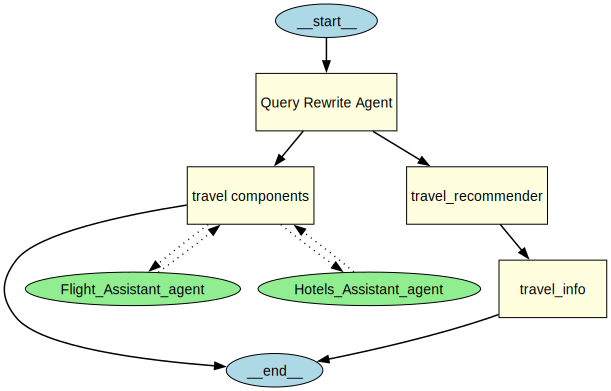

In [8]:
draw_graph(query_rewrite)

In [9]:
query_2 = "I am young university student who is looking for adventure. What would you recommend?"
res = Runner.run_sync(query_rewrite,query_2)

In [10]:
print(res.final_output)

To provide you with the best recommendations for your adventure as a young university student, I will break down your request into specific subquestions:

1. **Destination Preferences**: What type of destinations are you interested in? (e.g., mountains, beaches, cities, national parks)

2. **Travel Dates**: When are you planning to go on this adventure? Do you have specific dates or a general timeframe in mind?

3. **Budget**: What is your budget for this adventure? Are you looking for budget-friendly options, or are you open to spending a bit more for unique experiences?

4. **Activities**: What kind of adventurous activities are you interested in? (e.g., hiking, rock climbing, water sports, cultural experiences)

5. **Travel Companions**: Are you planning to travel alone, or will you be with friends or a group? 

6. **Accommodation Preferences**: What type of accommodation do you prefer? (e.g., hostels, camping, hotels, Airbnb)

7. **Transportation**: How do you plan to get to your d

In [ ]:
query_2 = "I am young university student who is looking for adventure. What would you recommend?"
res = Runner.run_sync(query_rewrite,query_2)